In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys

if not os.path.join(os.path.abspath(''), '../') in sys.path:
    sys.path.append(os.path.join(os.path.abspath(''), '../'))
    
from utils.classification import load_behaviors
from utils.meta import *
import warnings

### load predicted behaviors

In [2]:
behaviors = load_behaviors('../processed_dataset/behaviors_sni_combined.pkl')

In [3]:
def get_num_bouts(predict, behavior_classes):
    bout_counts = []
    bout_start_idx = np.where(np.diff(np.hstack([-1, predict])) != 0)[0]
    bout_start_label = predict[bout_start_idx]
    for b, behavior_name in enumerate(behavior_classes):
        idx_b = np.where(bout_start_label == int(b))[0]
        if len(idx_b) > 0:
            bout_counts.append(len(idx_b))
        else:
            bout_counts.append(np.NAN)
    return bout_counts

### plot -- Group (row) x Condition (column)

3 1


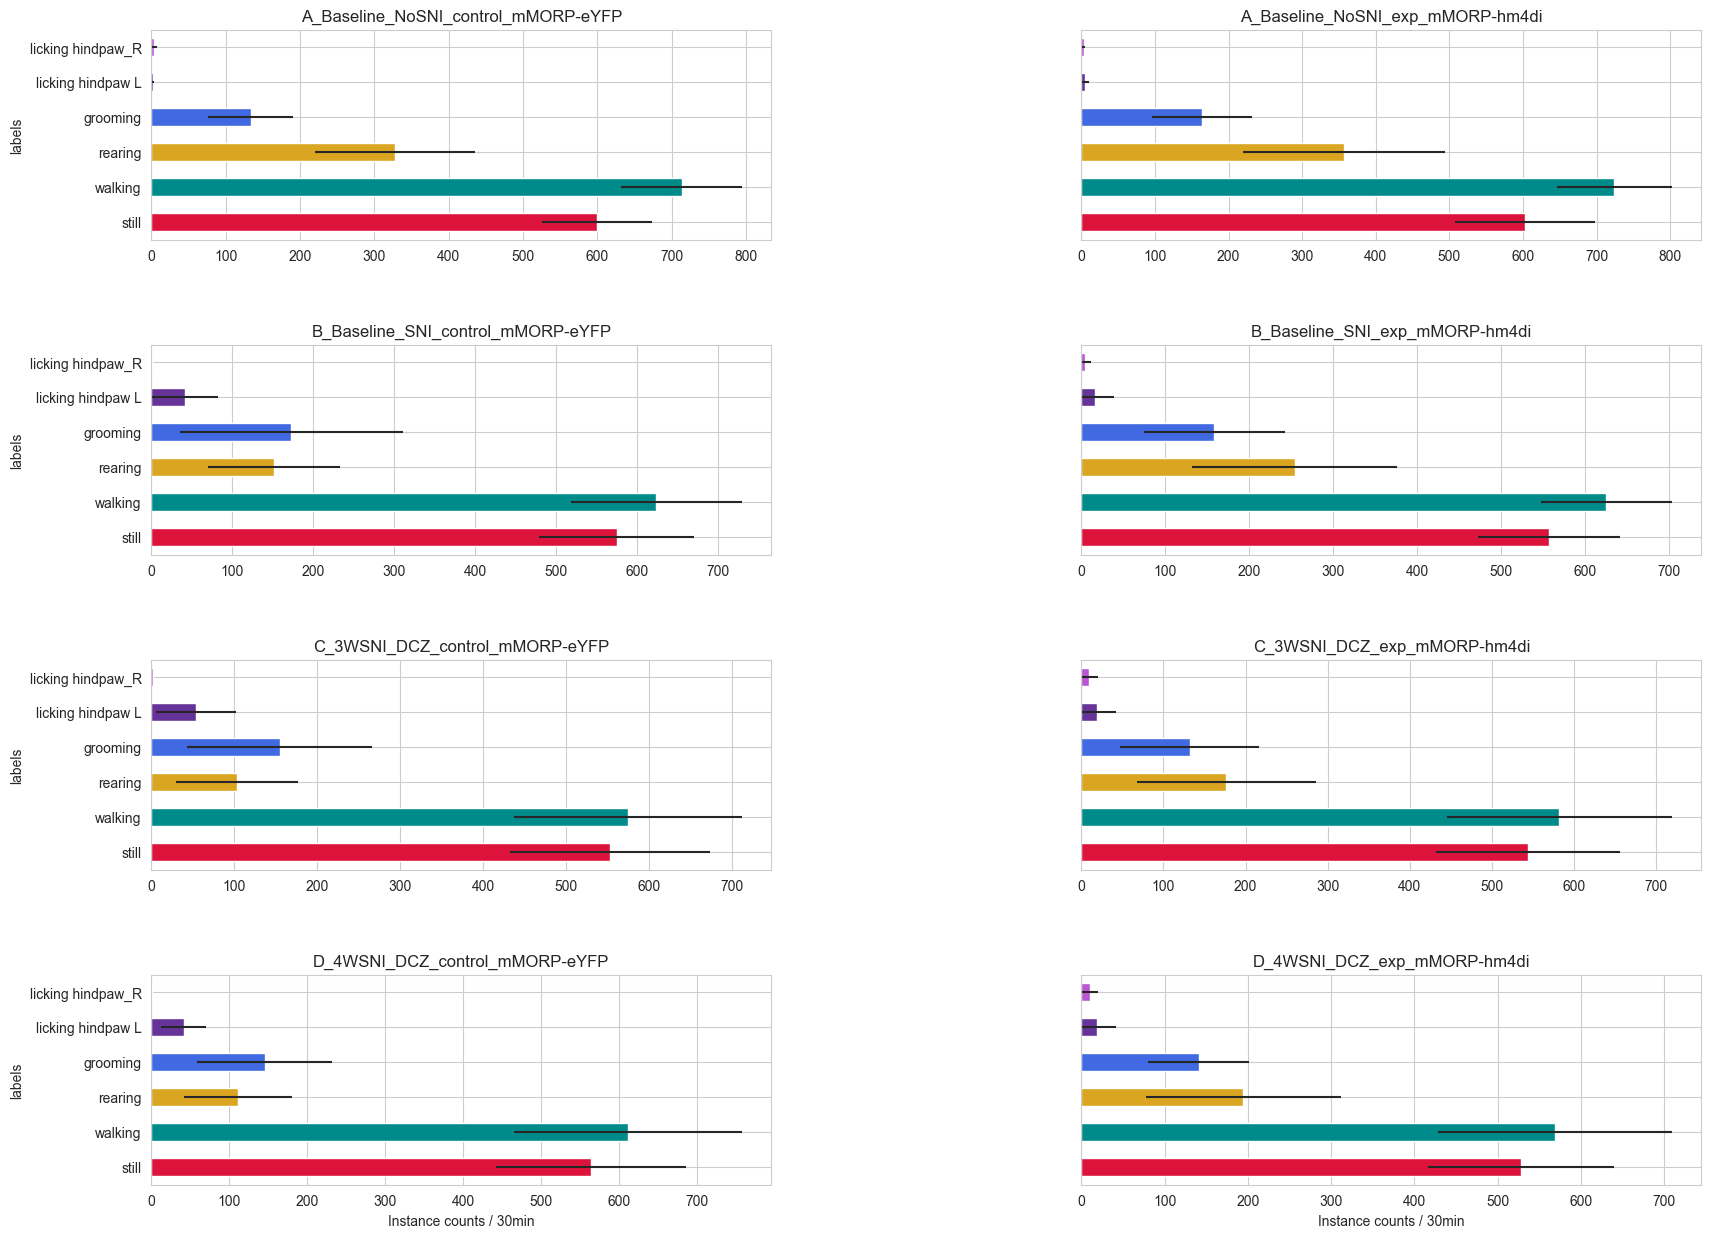

In [5]:
rows = len(groups_sni_combined)
cols = len(conditions_sni_combined)
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(20, 15), sharex=False, sharey=True)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for row in range(rows):
    if row > 4:
        cols = 1
        fig.delaxes(ax[row, 1])
        fig.delaxes(ax[row, 2])
    else:
        cols = len(conditions_sni_combined)
        
    for col in range(cols):
        
        selected_group = groups_sni_combined[row]
        selected_condition = conditions_sni_combined[col]
        
        bout_counts = []
        for f in range(len(behaviors[selected_group][selected_condition])):
            bout_counts.append(get_num_bouts(behaviors[selected_group][selected_condition][f'file{f}'], behavior_names))
        
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            bout_mean = np.nanmean(bout_counts, axis=0)
            bout_std = np.nanstd(bout_counts, axis=0)
            
        behavior_instance_dict = {'mean_counts': bout_mean,
                                  'std_counts': bout_std,
                                  'labels': behavior_names,
                                  'colors': behavior_colors,
                                  }
        behavior_instance_df = pd.DataFrame(behavior_instance_dict)
        
        behavior_instance_df.to_csv(f'../processed_dataset/behavior_instance_counts/behavior_instance_counts_{groups_sni_combined[row]}_{conditions_sni_combined[col]}_sni.csv')

        # Bar chart with errorbars
        behavior_instance_df.plot.barh(y='mean_counts', 
                                       x='labels', 
                                       xerr='std_counts', 
                                       color=behavior_colors, 
                                       legend=False, 
                                       ax=ax[row, col])
        if col == 1 or col == 2:
            if row == rows-1:
                print(row, col)
                ax[row, col].set_xlabel('Instance counts / 30min')
        
                
        if row == rows-1:
            ax[row, col].set_xlabel('Instance counts / 30min')
            
        ax[row, col].set_title(f'{groups_sni_combined[row]}_{conditions_sni_combined[col]}')
        ax[row, col].set_xlim(left=0)
        
plt.show()

### file save, change the extension to change the file format

In [6]:
fig.savefig(f'../figures/behavior_counts_sni_combined.svg', 
            dpi=600, bbox_inches='tight')